## Problem Statement

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

## About the dataset (Telecom Churn Data)

1.**Customer ID:** Primary key of the record 

2.**Churn:** Detecting which customers are likely to leave a service or to cancel a subscription to a service

3.**Monthly Revenue:** Revenue of each Customer 

4.**Monthly Minutes:** Number of Minutes call spoken by Customer

5.**Total Recurring Charge:** The Charges for the Service

6.**Director Assisted Calls:** When we call an operator to request a telephone number

7.**Overage Minutes:** Count of Call used over duration to particular post-paid cell phone plan

8.**Roaming Calls:** The ability to get access to the Internet when away from home at the price of a local call or at a charge considerably less than the regular long-distance charges

9.**PercChangeMinutes:**  It indicates Percentage Change in Minutes

10.**PercChangeRevenues:** Percentage change in Revenue

11.**Three way Calls:** A way of adding a third party to your conversation without the assistance of a telephone operator

12.**Dropped Calls:** Count of Phone calls gets disconnected somehow from the cellular network

13.**Blocked Calls:** Count of Telephone call that is unable to connect to an intended recipient

14.**Unanswered Calls:** Count of Calling that an individual perceives but is not currently pursuing

15.**Received Calls:** Number of calls received by the customer

16.**Out bound Calls:** Call initiated by the call  centre agent to customer  on behalf of client to know the target customer behaviour and needs

17.**Inbound Calls:** In inbound calls, call-centre or customer-care receives call from customer with issues and questions

18.**Peak Calls In Out:** Amount of time period with fewer calls than are handled in a busy period

19.**CustomerCareCalls:** Customer Care Calls Attempt Count

20.**OffPeakCallsInOut:** Amount of time period with more calls than are handled in a busy period

21.**Call Forwarding Calls:** Count of Calls Forwarded by user

22.**Dropped Blocked Calls:** Number of VM messages customer currently has on the server

23.**Call Waiting Calls:** Duration of call-in waiting period 

24.**Months In Service:** Number of months customer using service

25.**Unique Subs:** subscription of different networks

26.**Active Subs:** subscriptions of the networks that are active or in usage

27.**Handset Models:** Count of Handsets are used to Contact one to one

28.**CurrentEquipmentDays:** Number of days Current Equipment is used

29.**Age HH1:** User aged below 45

30.**Age HH2:** User aged above 45

31.**Children in HH:** Whether there are Children in House hold

32.**Handset Refurbished:** Are the handsets refurbished or not

33.**Handset Web Capable:** Are the handsets capable of internet connectivity

34.**Truck Owner:** Is the user a Truck Owner

35.**RV Owner:** Is the user an RV owner

36.**Home Ownership:** Is the house the user is staying, his own

37.**Buys Visa Mail Order:** Does the user buy Visa Mail order

38.**Responds to Mail Offers:** Does the user respond to Mail offers

39.**Opt-out Mailings:** Did he opt out of the mail offers sent to him

40.**Non-US-Travel:** Does the user travel to other countries

41.**Owns-Computer:** Does he have a computer or not

42.**Has-Credit Card:** Does he have a credit card or not

43.**Retention Calls:** No of Retention Calls

44.**Retention Offers Accepted:** Customers accepting retaining the retaining offers given by the company

45.**New Cell phone User:** Number of customers buying new cell phone

46.**NotNewCellphoneUser:** Number of customers uses exisiting cell phone

47.**Referrals Made By Subscriber:** Referrals made by the existing customer to the other customer

48.**Income Group:** SThe column talks about the customer saying to which category the customer belongs to

49.**Owns Motorcycle:** The columns ask about the customer weather the 
    customer owns a motorcycle or not
    
50.**AdjustmentsToCreditRating:** Adjustments made To CreditRating

51.**Handset Price:** Its amount paid by the customer for his cell phone

52.**MadeCallToRetentionTeam:** User call to Retention in same company

53.**CreditRating:** Credit card user rating (out of 7)

54.**PrizmCode:** Grouping of region according to users 

55.**Occupation:** Occupation of User

56.**MaritalStatus:** Marital Status Indicated by Yes/No/Unknown


# 1. Import Libraries

In [151]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [20,12]

# 2. Data Preparation

In [153]:
df=pd.read_csv(r"C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\Telecom churn\Capstone project\cell2celltrain.csv")
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,SEAPOR503,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,PITHOM412,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,MILMIL414,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,PITHOM412,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,OKCTUL918,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [154]:
df.shape

(51047, 58)

In [155]:
# As per the data we have 51047 observations and 58 variables are there

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.000000,3201956.877818,116905.561666,3000002.000000,3100632.000000,3201534.000000,3305376.000000,3399994.000000
MonthlyRevenue,50891.000000,58.834492,44.507336,-6.170000,33.610000,48.460000,71.065000,1223.380000
MonthlyMinutes,50891.000000,525.653416,529.871063,0.000000,158.000000,366.000000,723.000000,7359.000000
TotalRecurringCharge,50891.000000,46.830088,23.848871,-11.000000,30.000000,45.000000,60.000000,400.000000
DirectorAssistedCalls,50891.000000,0.895229,2.228546,0.000000,0.000000,0.250000,0.990000,159.390000
OverageMinutes,50891.000000,40.027785,96.588076,0.000000,0.000000,3.000000,41.000000,4321.000000
RoamingCalls,50891.000000,1.236244,9.818294,0.000000,0.000000,0.000000,0.300000,1112.400000
PercChangeMinutes,50680.000000,-11.547908,257.514772,-3875.000000,-83.000000,-5.000000,66.000000,5192.000000
PercChangeRevenues,50680.000000,-1.191985,39.574915,-1107.700000,-7.100000,-0.300000,1.600000,2483.500000
DroppedCalls,51047.000000,6.011489,9.043955,0.000000,0.700000,3.000000,7.700000,221.700000


**Interpretation**

Count of all the columns are different.So we can assume that their is nullvalues

We can see difference in both mean and median.So the data is not normally distributed

Also there is presence of outliers because the difference between min and max is more

**2.1 Check the Data Type**


**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [157]:
df.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

**Interpretation:** 
    
The variables `CustomerID`, `Churn`, `MonthlyRevenue`, `MonthlyMinutes`,
       `TotalRecurringCharge`, `DirectorAssistedCalls`, `OverageMinutes`,
       `RoamingCalls`, `PercChangeMinutes`, `PercChangeRevenues`,
       `DroppedCalls`, `BlockedCalls`, `UnansweredCalls`, `CustomerCareCalls`,
       `ThreewayCalls`, `ReceivedCalls`, `OutboundCalls`, `InboundCalls`,
           `PeakCallsInOut`, `OffPeakCallsInOut`, `DroppedBlockedCalls`,
       `CallForwardingCalls`, `CallWaitingCalls`, `MonthsInService`,
       `UniqueSubs`, `ActiveSubs`, `Handsets`, `HandsetModels`,
       `CurrentEquipmentDays`, `AgeHH1`, `AgeHH2`,`AdjustmentsToCreditRating`,
        `ReferralsMadeBySubscriber`, `IncomeGroup`,`RetentionCalls`, 
        `RetentionOffersAccepted` are Numerical.
        
The variables`ChildrenInHH`,`HandsetRefurbished`, `HandsetWebCapable`, `TruckOwner`, 
       `RVOwner`,`Homeownership`, `BuysViaMailOrder`, `RespondsToMailOffers`,
       `OptOutMailings`, `NonUSTravel`,`OwnsComputer`,`HasCreditCard`,
       `NewCellphoneUser`,`ServiceArea`,`NotNewCellphoneUser`, `OwnsMotorcycle`,
       `MadeCallToRetentionTeam`, `CreditRating`, `PrizmCode`, `Occupation`,
       `MaritalStatus` are Object.


**Drope unnecessary columns**

In [158]:
df.drop(['ServiceArea','CustomerID'], axis=1, inplace=True)

In [159]:
df.shape

(51047, 56)

# 3.Data Cleaning

# 3.1 Calculate the missing values

In [160]:
dtyp = pd.DataFrame(df.dtypes).rename(index={0:'column Type'}) 
Total=df.isnull().sum().sort_values(ascending=True)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=True) 
missing_data = pd.concat([dtyp,Total, Percent], axis = 1, keys = ['Data type','Total', 'Percentage of Missing Values'])
missing_data

,Data type,Total,Percentage of Missing Values
,0,0,1
Churn,object,0,0.000000
MonthlyRevenue,float64,156,0.305601
MonthlyMinutes,float64,156,0.305601
TotalRecurringCharge,float64,156,0.305601
DirectorAssistedCalls,float64,156,0.305601
OverageMinutes,float64,156,0.305601
RoamingCalls,float64,156,0.305601
PercChangeMinutes,float64,367,0.718945
PercChangeRevenues,float64,367,0.718945


We shall replace the missing values with median value.

In [161]:
# select the columns to replace missing values
cols_to_replace = ['AgeHH1', 'AgeHH2', 'PercChangeMinutes', 'PercChangeRevenues', 'MonthlyMinutes',
                   'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
                   'MonthlyRevenue', 'HandsetModels', 'Handsets', 'CurrentEquipmentDays']

# replace missing values with the median of each column
for col in cols_to_replace:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# print the updated DataFrame
#print(df.head())


In [162]:
dtyp = pd.DataFrame(df.dtypes).rename(index={0:'column Type'}) 
Total=df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([dtyp,Total, Percent], axis = 1, keys = ['Data type','Total', 'Percentage of Missing Values'])
missing_data

,Data type,Total,Percentage of Missing Values
,0,0,1
Churn,object,0,0.000000
MonthlyRevenue,float64,0,0.000000
MonthlyMinutes,float64,0,0.000000
TotalRecurringCharge,float64,0,0.000000
DirectorAssistedCalls,float64,0,0.000000
OverageMinutes,float64,0,0.000000
RoamingCalls,float64,0,0.000000
PercChangeMinutes,float64,0,0.000000
PercChangeRevenues,float64,0,0.000000


In [163]:
# All the null values of the numerical columns replaced with mean

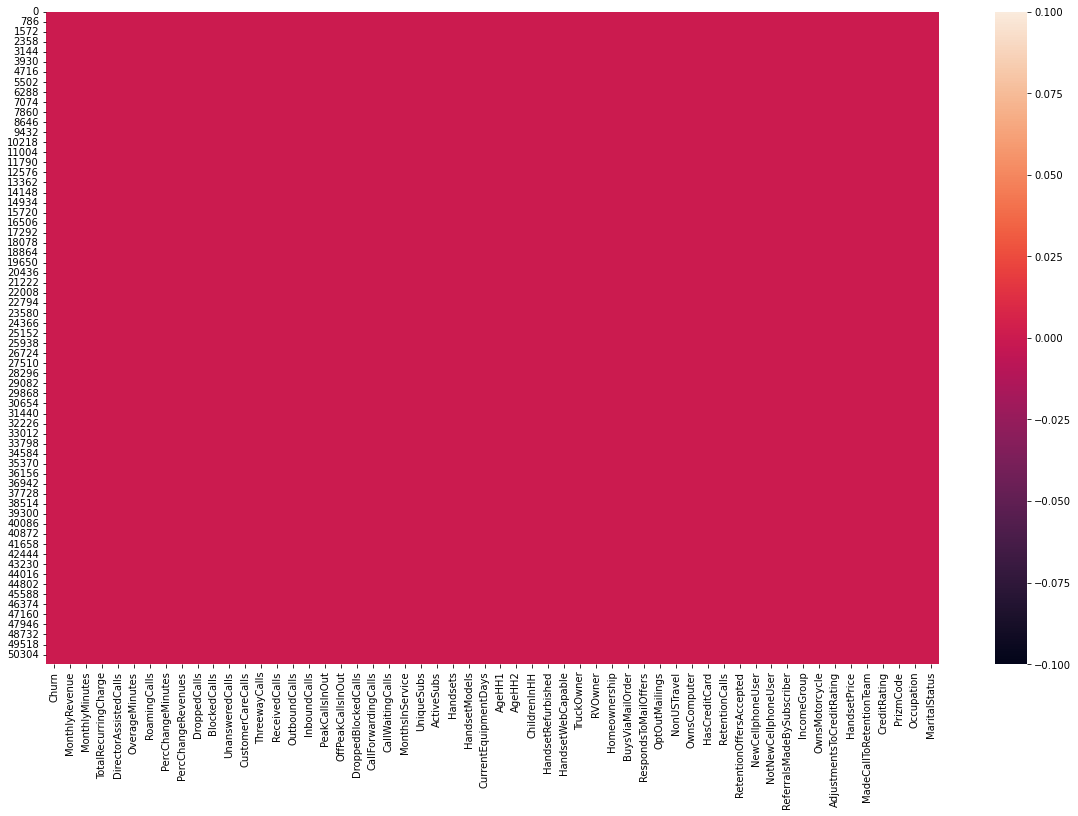

In [164]:
#plotting Heatmap to visualize missing Values
sns.heatmap(df.isna())
plt.show()

In [48]:
# As we can see their is no null values

In [165]:
df['HandsetPrice'].unique() # Checking unique values

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

In [168]:
df['HandsetPrice'] = df['HandsetPrice'].replace('Unknown',np.nan)

In [169]:
df['HandsetPrice'].unique()

array(['30', nan, '10', '80', '150', '300', '40', '200', '100', '130',
       '60', '400', '240', '250', '180', '500'], dtype=object)

In [170]:
median_price = df['HandsetPrice'].median()
median_price


60.0

In [171]:
df['HandsetPrice'] = df['HandsetPrice'].fillna(median_price)

In [17]:
#Here we replace the word unknown from the 'HandsetPrice' column by using median. Because their is outliers, so we didn't 
#use the mean

In [174]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'HandsetPrice'
df['HandsetPrice'] = df['HandsetPrice'].astype(int)


In [175]:
df['HandsetPrice'].unique()

array([ 30,  60,  10,  80, 150, 300,  40, 200, 100, 130, 400, 240, 250,
       180, 500])

**Interpretation:** Now, all the variables have the correct data type.

**Check unique values of all the columns**

In [176]:
# create a list of columns to get unique values for
cols = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice']

# loop through the columns and print the unique values
for col in cols:
    print(col)
    print(df[col].unique())

MonthlyRevenue
[ 24.    16.99  38.   ...  27.11 534.93 109.96]
MonthlyMinutes
[ 219.   10.    8. ... 3360. 4719. 2437.]
TotalRecurringCharge
[ 22.  17.  38.  75.  52.  30.  66.  35.  25.  85.  37.  60.  70. 100.
  50.  55.  68.  20.  45. 150.  83.  19.  71.  15.  58.  89.  95.  78.
  80.  77. 183. 213.  87.  27. 108.  32.  59.   5.  40.  10. 105. 107.
  74. 102. 140.  63.  93. 202.  49.  48.  81.  57.  24.  21.  47.  97.
 160. 110.  82.  42.  36. 115.  76.   7. 200. 207.  31.  92. 101.  91.
  90.  62. 300.  56. 121.  99.   8.   9.  79.  67.  73.  84.  65.  43.
  61. 120.  18.  53.  12.  64.  11.  41.  44.  86.  88. 210. 106.  54.
  13.  29.  34.   0. 155.  98. 281. 112.  28.  46. 175.  51. 117. 138.
  16. 180. 170.  39. 103.  72. 338.  26.  96. 151. 119. 135.  33. 169.
  23. 219.   4. 232.  94.  69. 149. 127. 146. 174. 130. 172. 182. 116.
 126.  14. 104. 157.  -2. 145. 141. 132. 111.   3. 177. 125. 190. 129.
   6. 137. 227. 310. 302. 148. 142. 124. 122. 161.   2. 113. 164. 133.
 136. 2

In [21]:
#Replace all the 'NaN' values

In [177]:
for col in ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice']:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

In [179]:
#creating a copy of orignal Dataset
df1=df.copy()

**Duplicate Values**

In [180]:
#checking for duplicate values
print(df1.duplicated().sum())
print(' ')
print(f'Dataset have {df1.duplicated().sum()} duplicate values.')

0
 
Dataset have 0 duplicate values.


# **3.2 Outlier Analysis**

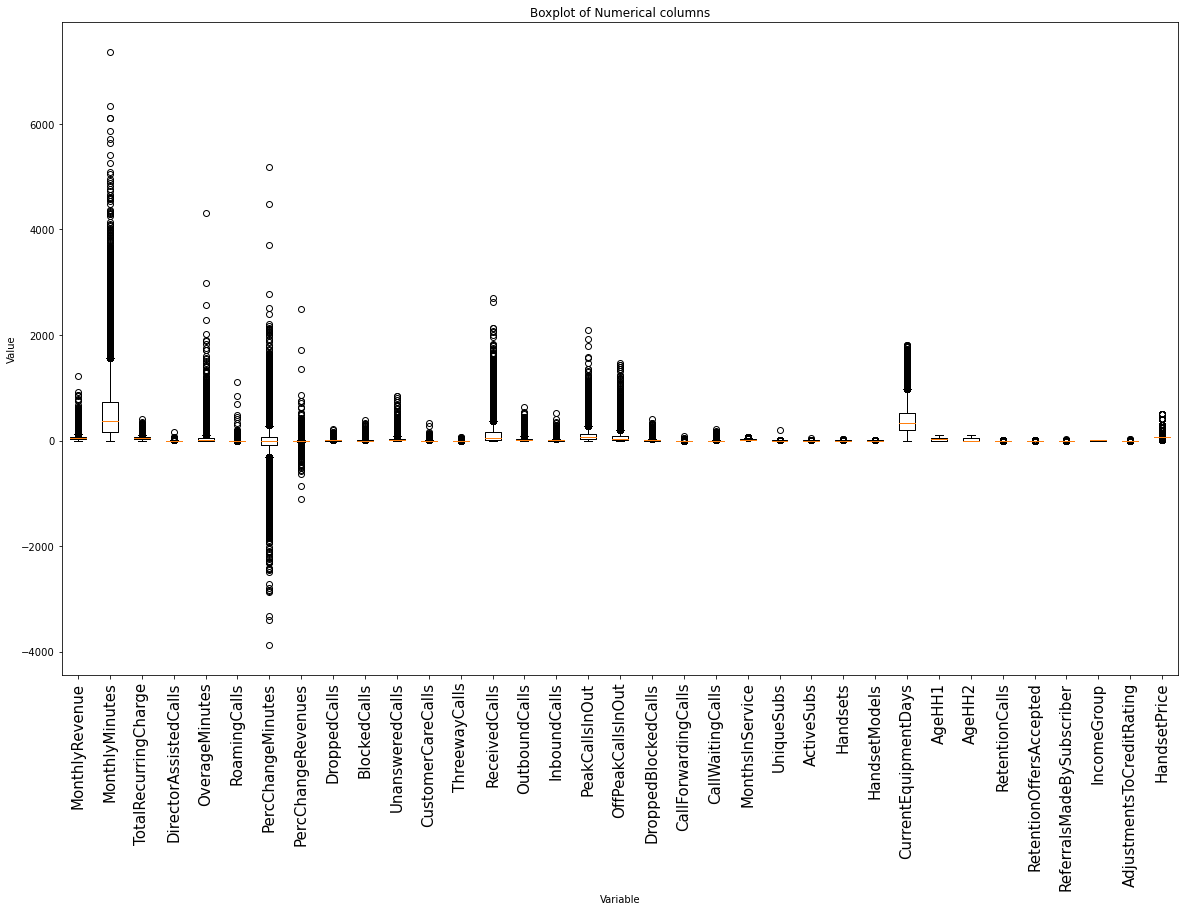

In [183]:
num_vars = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 
            'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 
            'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 
            'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 
            'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 
            'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 
            'AdjustmentsToCreditRating', 'HandsetPrice']
df_num = df[num_vars]
plt.boxplot(df_num.values)
plt.xticks(range(1,len(num_vars)+1),num_vars,rotation = 'vertical', fontsize = 15)
plt.title('Boxplot of Numerical columns')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

**Inference:** By Visualizing above Boxplot we can see that all the Features have potential outliers and some of the features have certain extreme values.

**Reason for outliers exist in the data:**

Variability in the Data

An experimental measurment error

**Impact of outliers on Dataset:**

it causes various problem during statstical analysis

It effects the mean and standard deviation

### Skewness Before Transformation

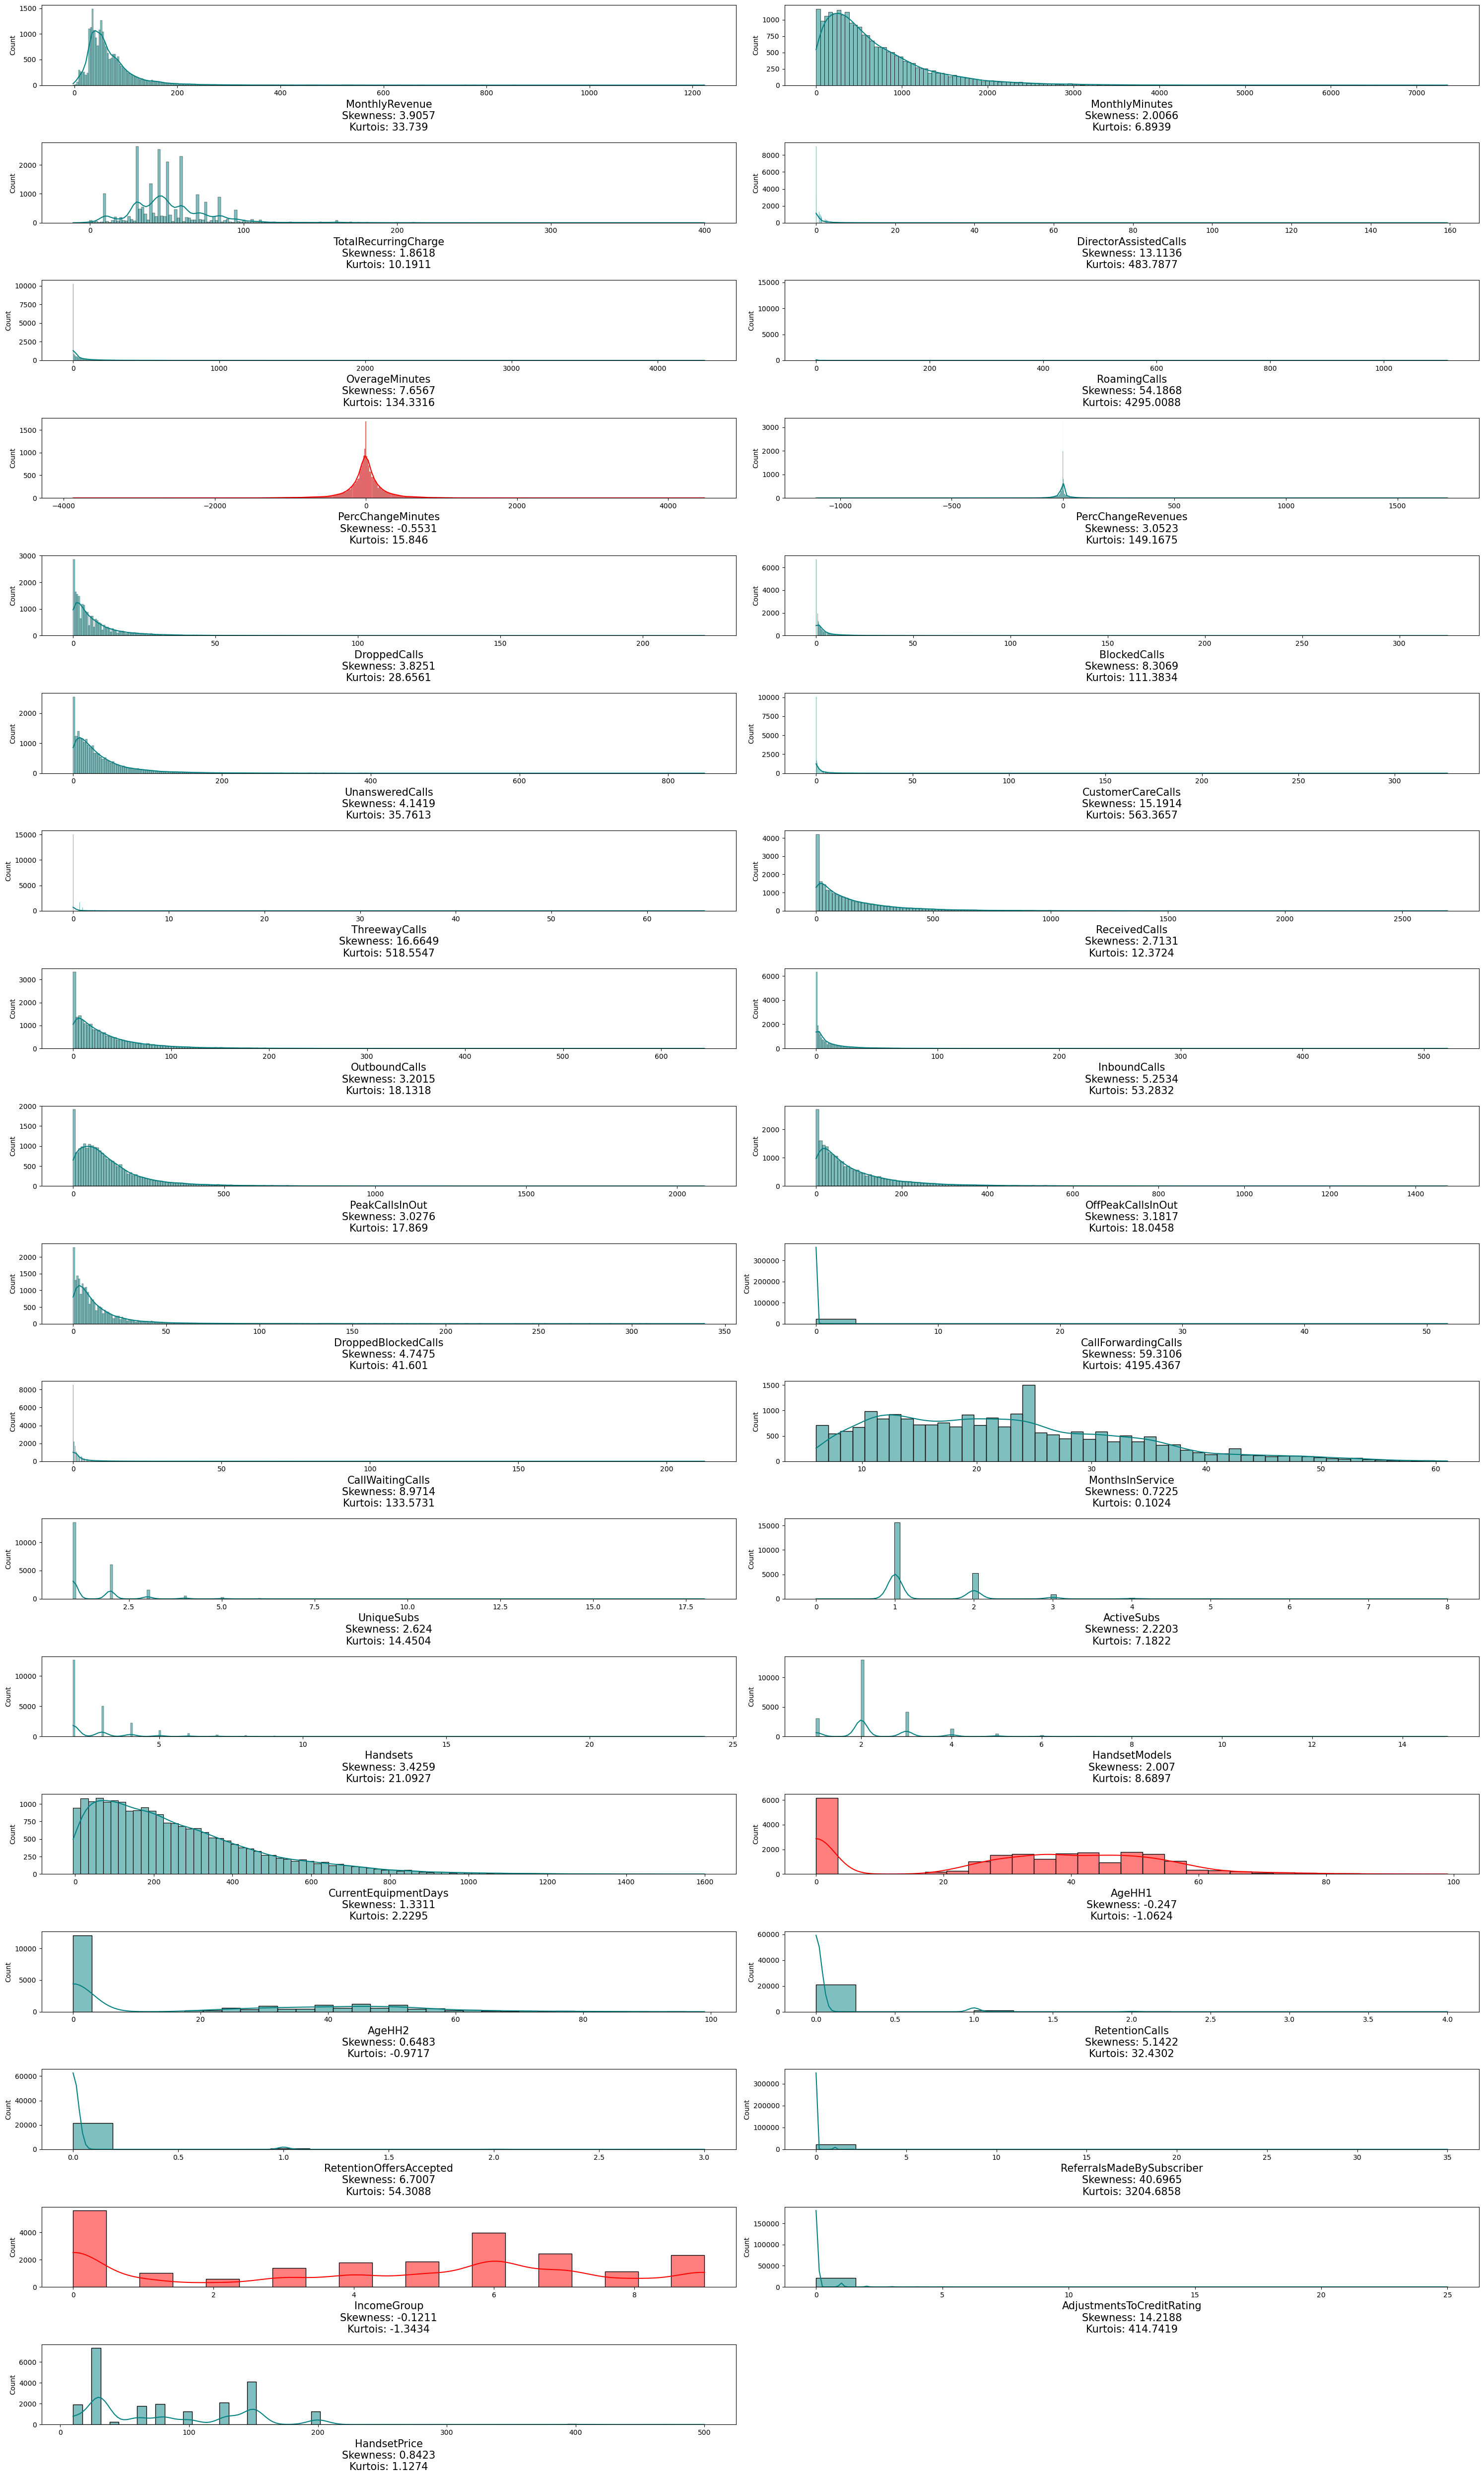

In [26]:
#checking and visualizing skewness of each feature by using dist plot
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(30,50),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    if df[i].skew() < 0 :
        sns.histplot(df[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df[i],color='teal',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

Inference: Here by visualizing dist plot we can see that the Features plotted in Teal color are positively skewed and Features plotted in red color are Negatively Skewed.

--: To reduce the impact of skewness we can use various transformation techiniques

In [189]:
#numerical_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

# print the numerical columns
#print(numerical_cols)

In [188]:
#categ_cols = df.select_dtypes(include=['object']).columns.tolist()

#print the numerical columns
#print(categ_cols)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 4.Descriptive statistics(EDA)

# 4.1.Univariate Analysis

Univariate Analysis on Churn

In [186]:
df['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

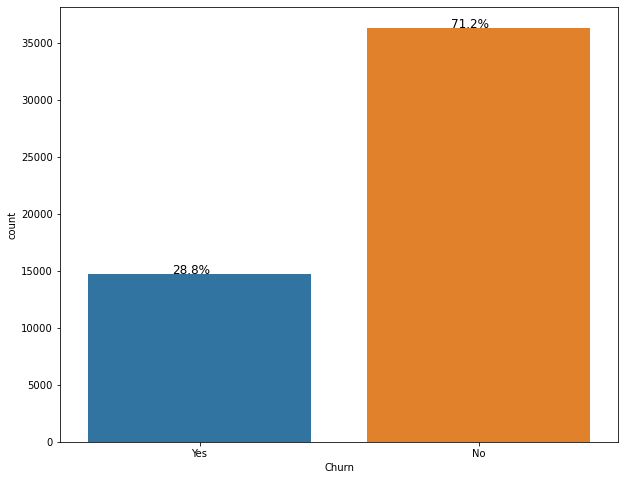

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', data=df)

# Add percentage text to each bar
total = len(df['Churn'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    plt.gca().annotate(percentage, (x, y), size=12)

# Show plot
plt.show()


Observation: As we can see the Target Variable 71% are still in the same connection and balance 29% are Churns

**Univariate Analysis on Categorical Columns**

In [190]:
# List only the Categorical columns
df_cat = df.select_dtypes(include=['object']).columns
print(df_cat)

Index(['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating',
       'PrizmCode', 'Occupation', 'MaritalStatus'],
      dtype='object')


In [191]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

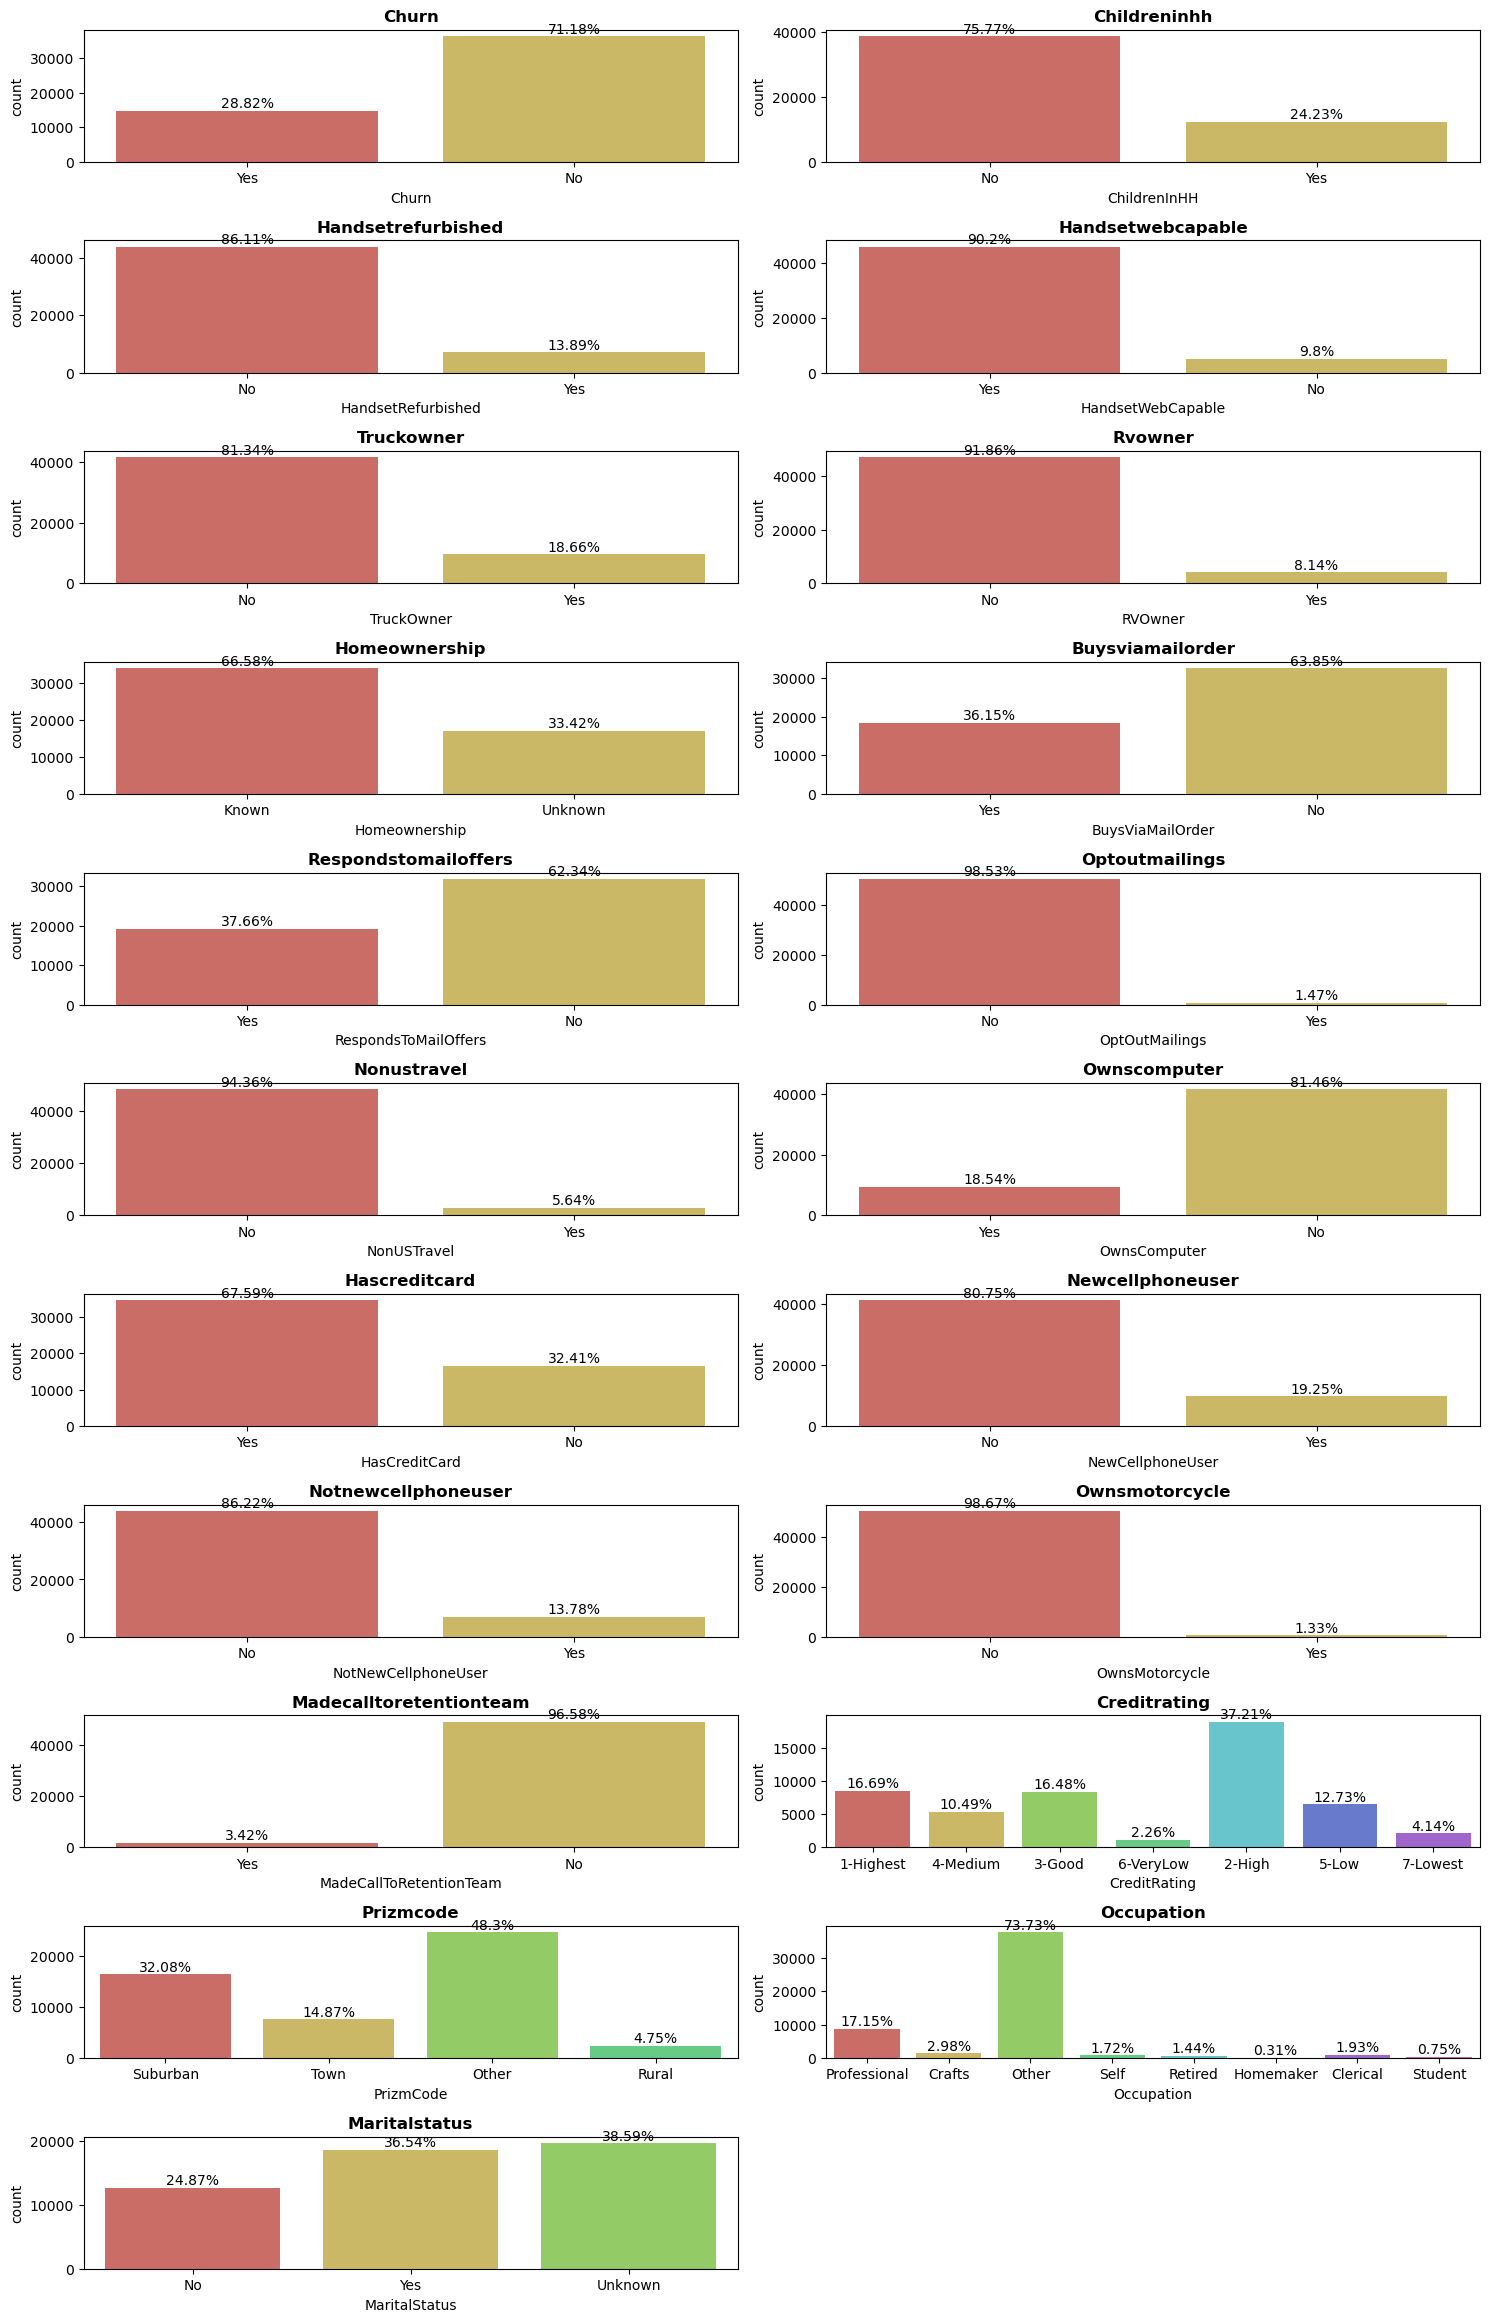

In [192]:
#plotting countplot for some categorical variable

plt.figure(figsize=(15,25),dpi=100)
n=1
for i in df_cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**Obeservations**

1) Churn Over 27 percent of people in the data have churned.

2) Handseter capable More than 90 percent of the people in the data have internet support on their phone.

3) More than 65 percent of them don't have a credit card

4) Less than 2 percent of them own a motorcycle

5) More than half of the people's handset price is unknown

6) Over 70 percent of the data has occupations other than the ones mentioned.

7) Martial status of 60 percent of the data is known out of which, 26 percent are not married. The rest are unknown.

**Univariate Analysis on Numerical Columns**

In [197]:
df_num=df.select_dtypes(include=np.number)


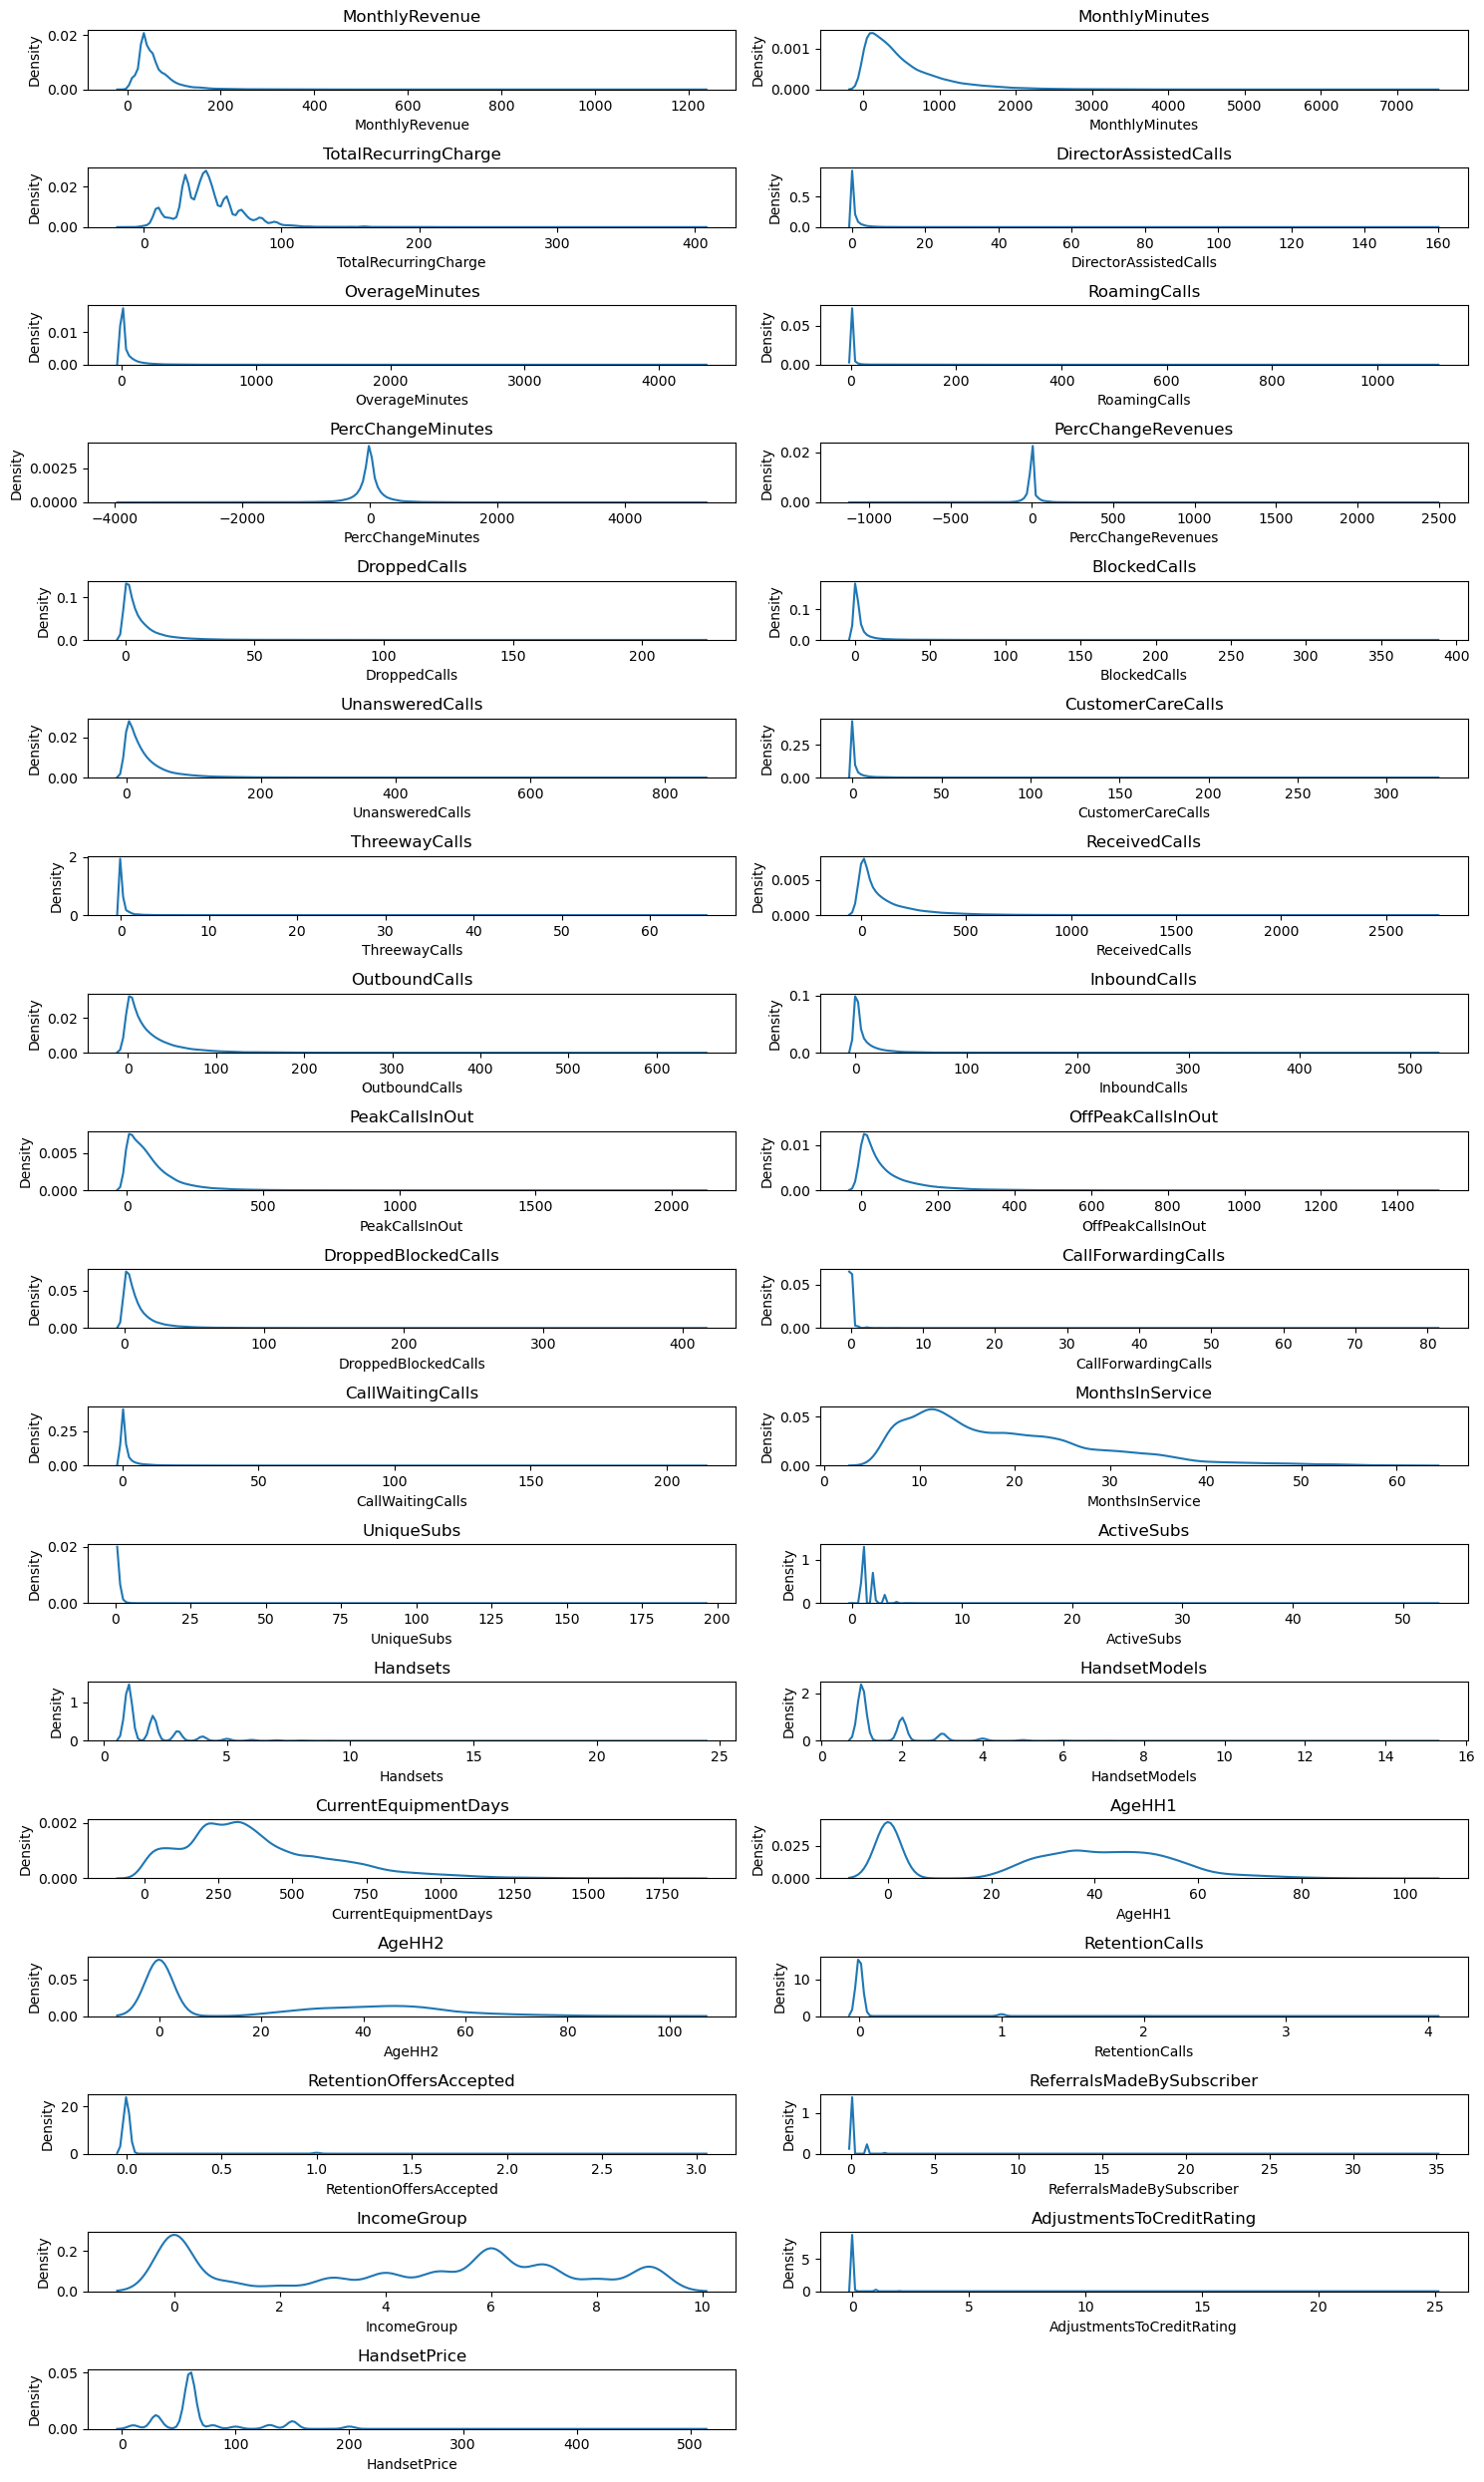

In [194]:
# Kde Plot for Numerical features

plt.figure(figsize=(15,25),dpi=100)
n=1
for i in df_num:
    plot=plt.subplot(18,2,n)
    n+=1
    plt.title(i)
    sns.kdeplot(data=df[i])
    plt.tight_layout()
    annot_percent(plot)

# 4.2.Bivariate Analysis

**Bivariate Analysis on Categorical - Categorical**

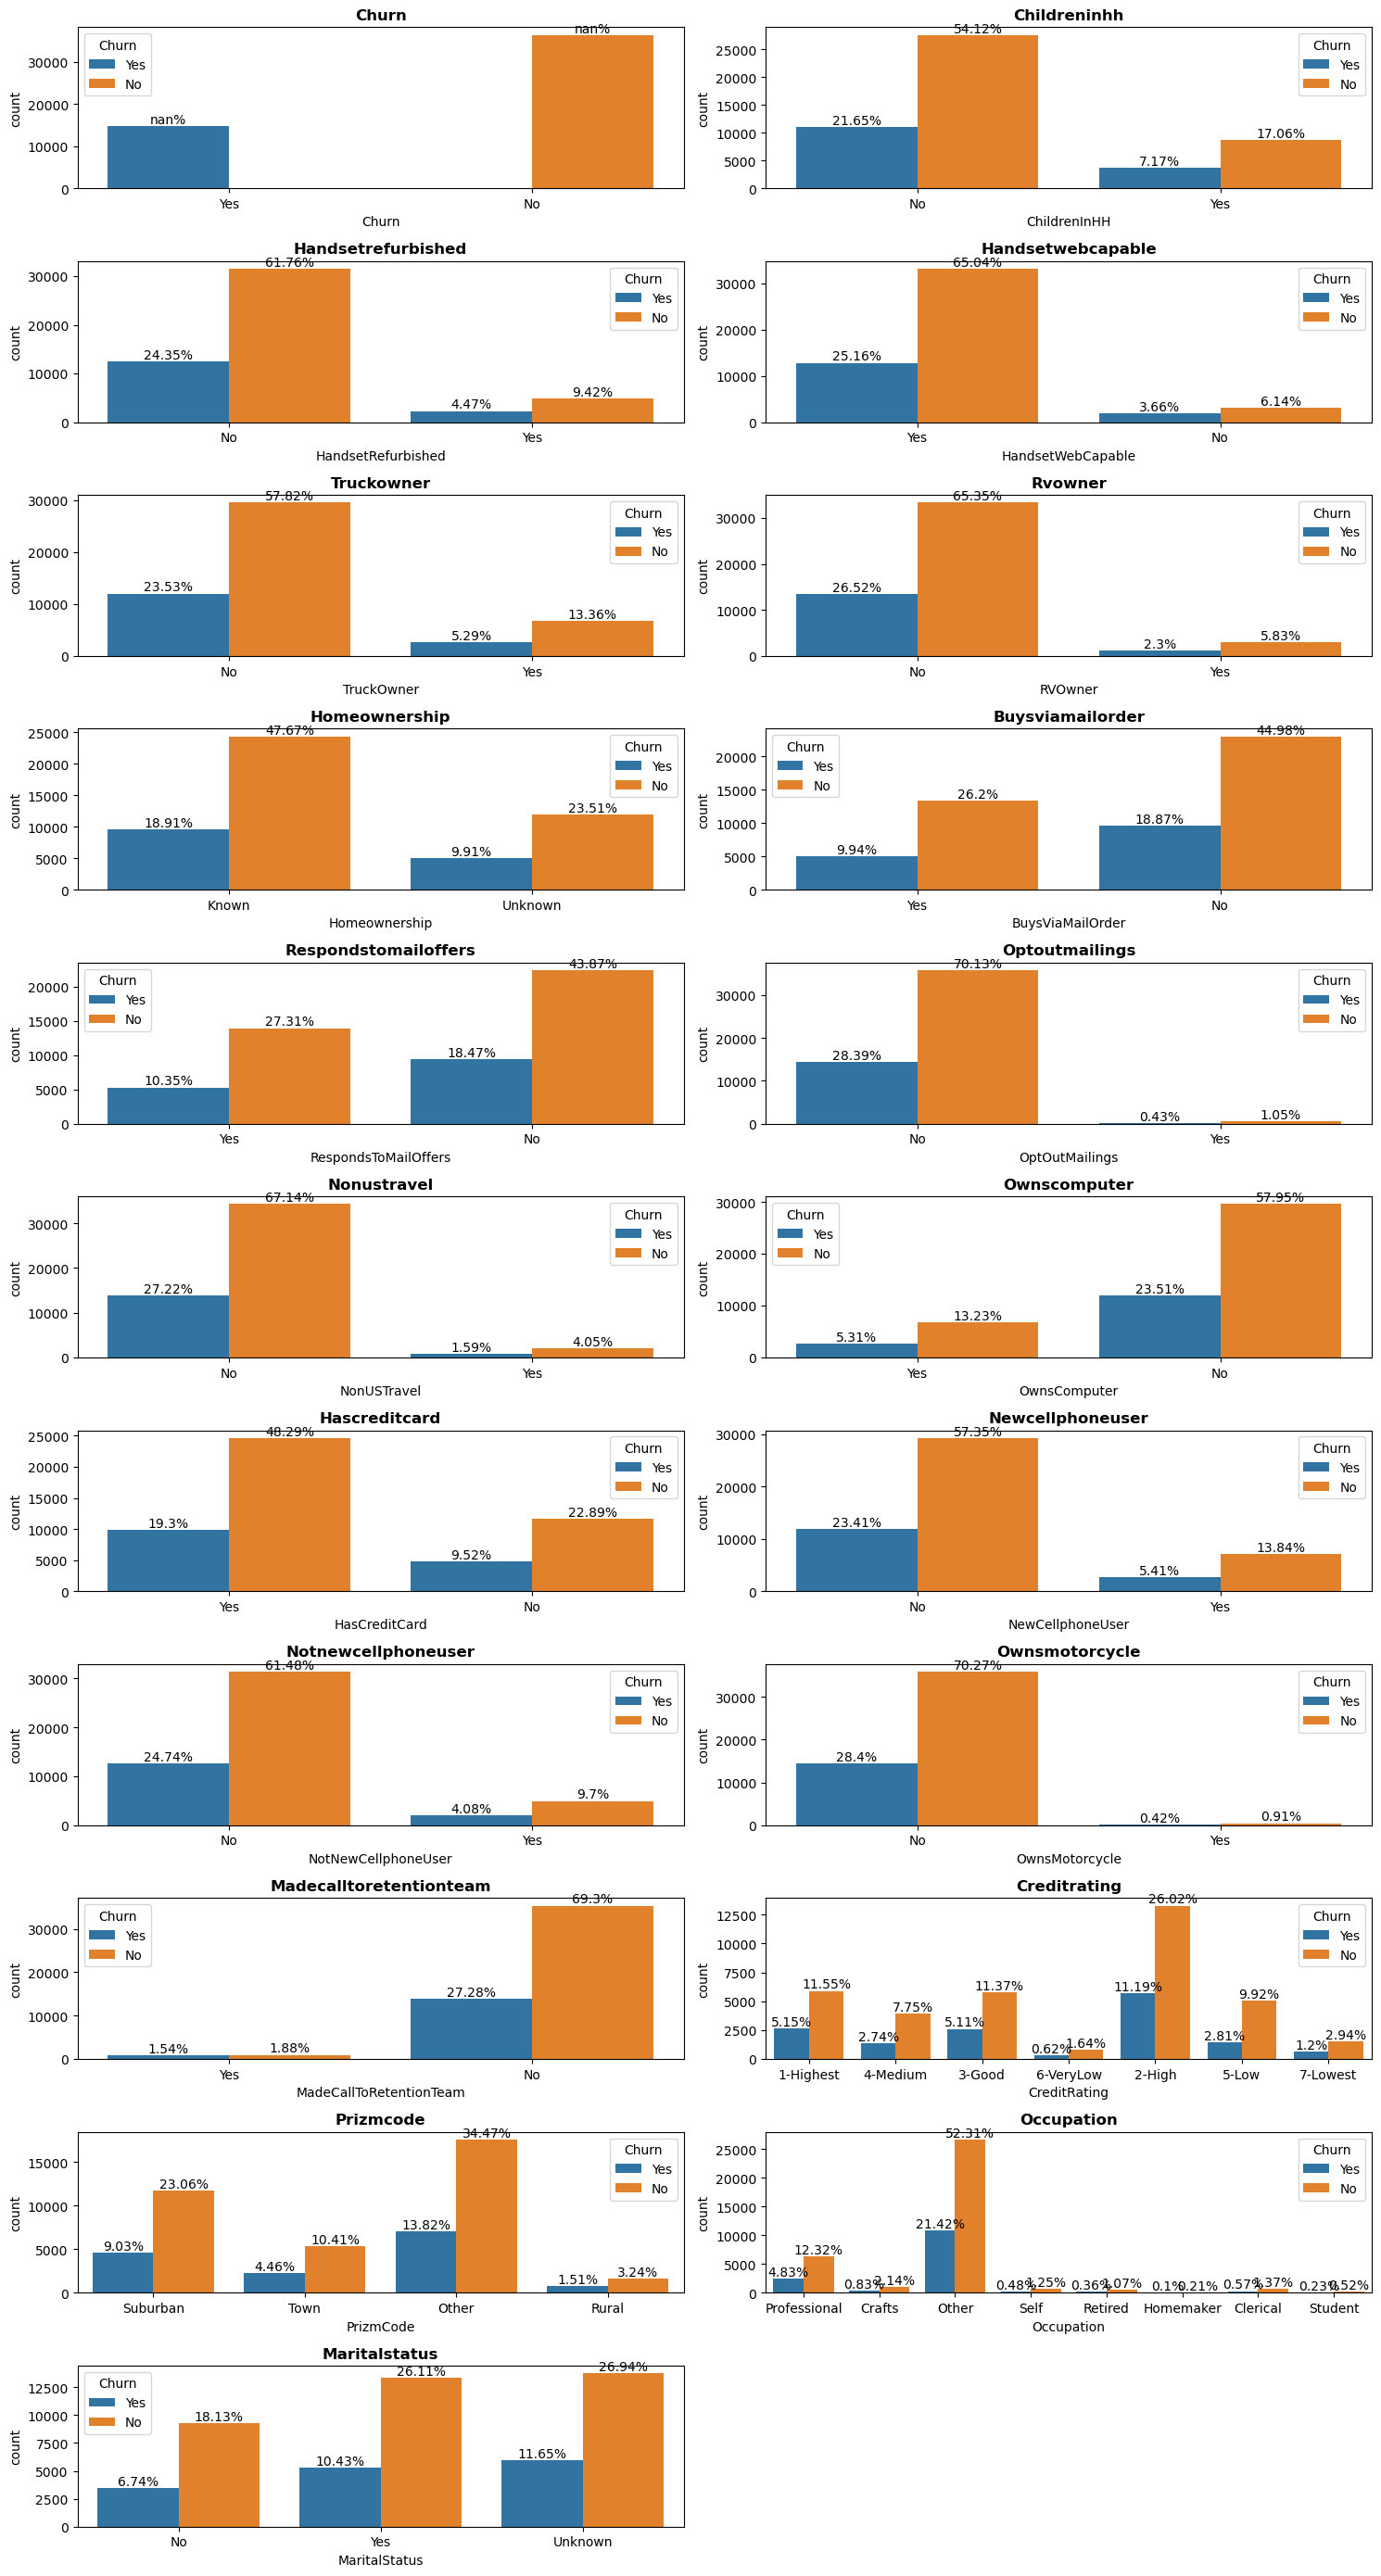

In [195]:
plt.figure(figsize=(15,30),dpi=100)
n=1
for i in df_cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df[i],hue= df['Churn'])
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot) 

observation:
    
In Handset web capability over 25% of people who have churned has more than 90% of Internet capability on their phone.

Less than 6% of people who own New phone have churned

Data show that people who have Credit Cards are more likely to Churn

Marital Status of people churning is independent

People who have responded mail offer are less likely to churn

# 4.3.Multivariate Analysis

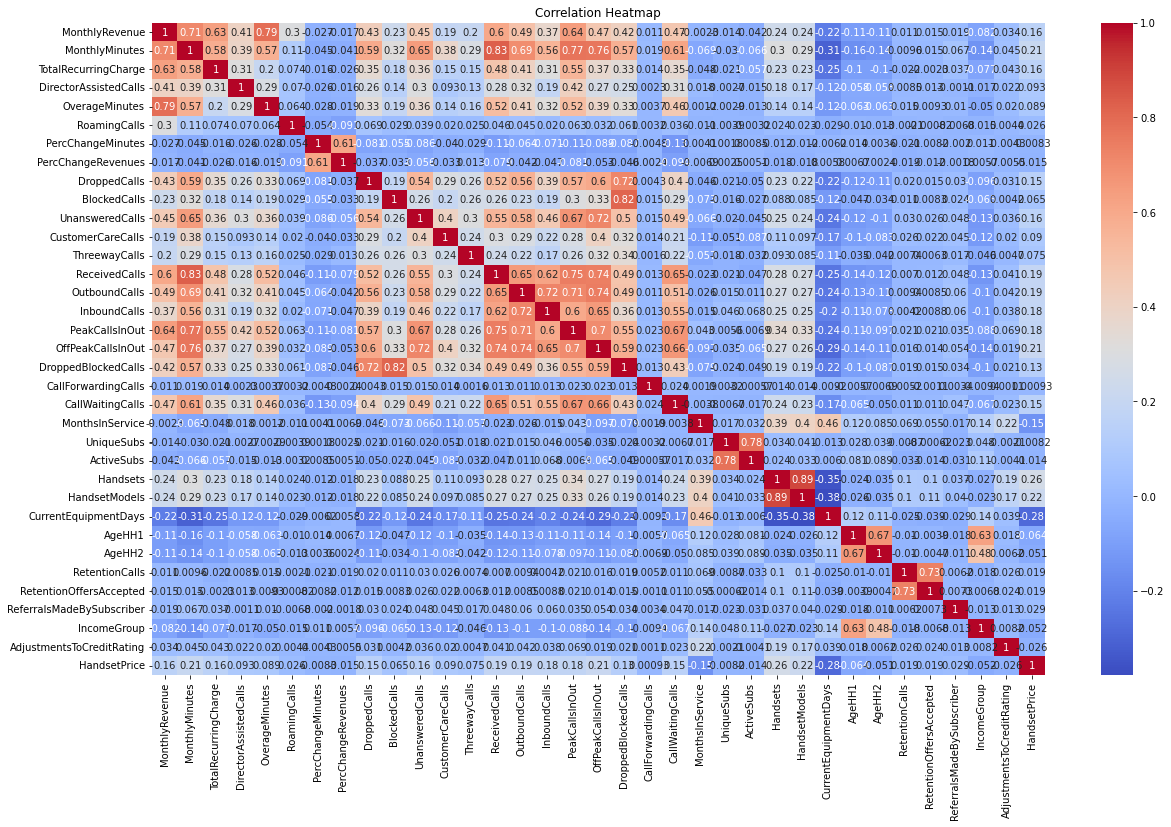

In [202]:
# create correlation matrix
corr_matrix = df.corr()

# create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='MonthlyMinutes'>

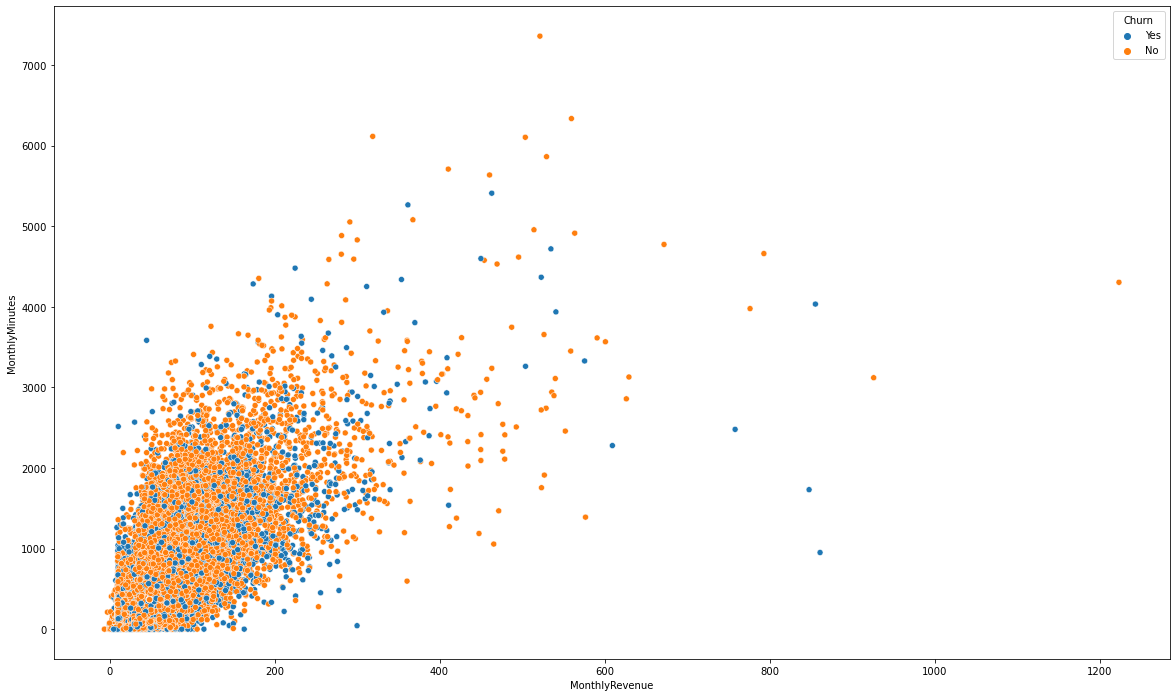

In [203]:
sns.scatterplot(x="MonthlyRevenue", y="MonthlyMinutes",hue='Churn', data=df)

Observation

According plot as Monthly Revenue Increases, Then the number of Monthly Minutes increases, But we can't draw any conclusion on churn

<AxesSubplot:xlabel='HandsetWebCapable', ylabel='Handsets'>

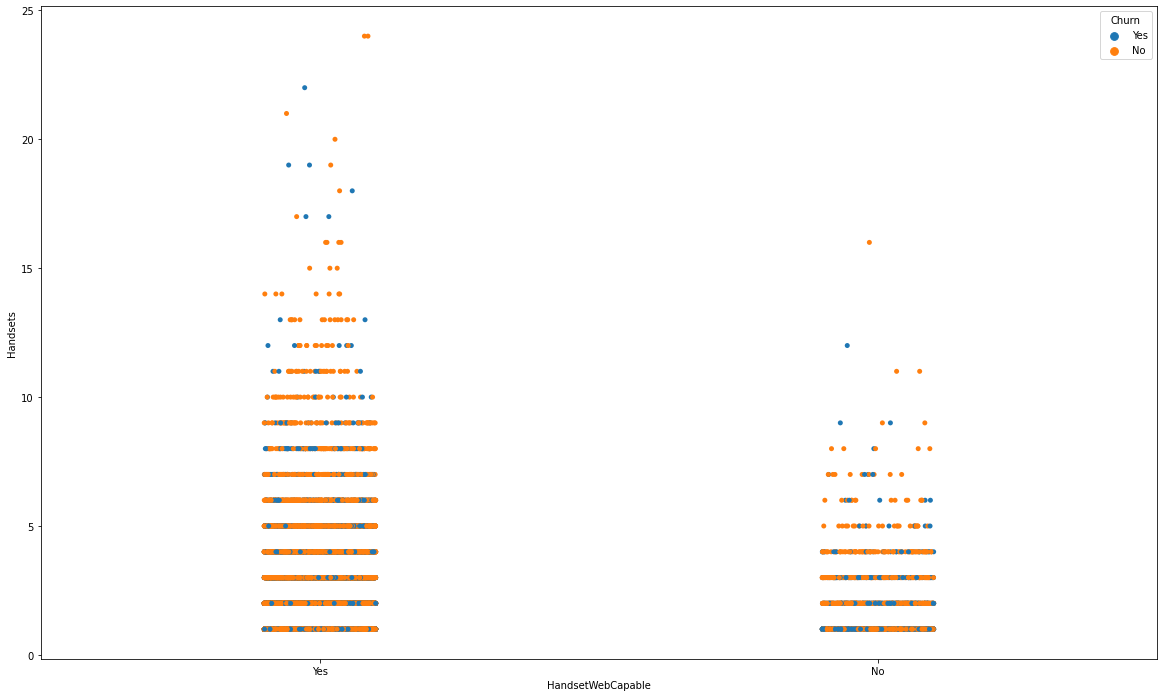

In [204]:
sns.stripplot(y=df["Handsets"],x='HandsetWebCapable',hue='Churn', data=df,orient='v')

Observation:

Here we can assume that certain percentage people's are more likely to churn while increasing the number of handset


# 5.Statistics(Stats)

## **5.1.Chi-Square Test for Independence**

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Here we can check if the catagorical features are dependent on our target.
We are assuming the level of confidence as 95%

In [206]:
df_cat=df.select_dtypes(include=object)
df_cat.head()

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,1-Highest,Suburban,Professional,No
1,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,4-Medium,Suburban,Professional,Yes
2,No,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,No,3-Good,Town,Crafts,Yes
3,No,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,No,4-Medium,Other,Other,No
4,Yes,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,1-Highest,Other,Professional,Yes


In [207]:
# taking only the features from catagories
df_categorical_features=df_cat.drop('Churn',axis=1)
df_target=df_cat['Churn']

In [208]:
for i in df_categorical_features.columns:
    
    print('for: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    
    # use the 'chi2_contingency()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
    # pass the observed values to the parameter, 'observed'
    # 'correction = False' will not apply the Yates' correction
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

    print("Test statistic:", test_stat)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected values:", '\n',expected_value)
    
    if p > 0.05:
        print('The above output shows that the chi-square the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and loan_status are independent.'.format(i))
    else:
        print('The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and loan_status are dependent.'.format(i))   

for:  ChildrenInHH
The null and alternative hypothesis is:
 
H0: The variables ChildrenInHH and loan_status are independent
H1: The variables ChildrenInHH and loan_status are not independent

Test statistic: 4.667319565578522
p-value: 0.03074187130655134
Degrees of freedom: 1
Expected values: 
 [[27532.27699963 11146.72300037]
 [ 8803.72300037  3564.27699963]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables ChildrenInHH and loan_status are dependent.
for:  HandsetRefurbished
The null and alternative hypothesis is:
 
H0: The variables HandsetRefurbished and loan_status are independent
H1: The variables HandsetRefurbished and loan_status are not independent

Test statistic: 45.786197423034764
p-value: 1.3188957351906786e-11
Degrees of freedom: 1
Expected values: 
 [[31288.52265559 12667.47734441]
 [ 5047.47734441  2043.52265559]]
The above output shows that the chi-square the p-value is lesse

In [209]:
print('The dependent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p < 0.05:
        print(i)

The dependent categorical variable found after Chi-Square Test for Independence are:

ChildrenInHH
HandsetRefurbished
HandsetWebCapable
Homeownership
BuysViaMailOrder
RespondsToMailOffers
MadeCallToRetentionTeam
CreditRating
PrizmCode
MaritalStatus


In [210]:
print('The independent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p > 0.05:
        print(i)

The independent categorical variable found after Chi-Square Test for Independence are:

TruckOwner
RVOwner
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
NewCellphoneUser
NotNewCellphoneUser
OwnsMotorcycle
Occupation


# 5.2 Checking significance for numerical features

In [211]:
df_num=df.select_dtypes(include=np.number)
df_target=df_cat['Churn']
df_num.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,1,0,0,4,0,30
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,0,0,0,5,0,30
2,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,0,0,0,6,0,60
3,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,0,0,0,6,0,10
4,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,0,0,0,9,1,10


In [212]:
# importing jarque_bera function from the scipy.stats library
from scipy.stats import jarque_bera

The null and alternative hypothesis for jarque_bera is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data is normally distributed. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data is not normally distributed. </strong></p>

Assuming the level of confidence as 95%

In [213]:
# defining a function to get if both sets of 
def get_jarque_bera(Churn_Yes_set,Churn_No_set):
    stat_co,p_co=jarque_bera(Churn_Yes_set)
    stat_fp,p_fp=jarque_bera(Churn_No_set)
    if p_co > 0.05 and p_fp > 0.05:
        print('Since the pvalue of both the Charged_Off_set and Fully_Paid_set are greater then 0.05, we do not have enough evidence to reject the null hypothesis for both')
        print('Both sets are normaly distributed')
    elif p_co < 0.05 and p_fp < 0.05: 
        print('Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis')
        print('Both sets are not normaly distributed')
    elif p_co < 0.05 or p_fp < 0.05: 
        print('Since the pvalue of either the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis of the variable with p_value < 0.05 ')
        print('Either one of sets is not normaly distributed')

we will saperate each numerical column into two sets according to the target variable which are in this case Yes and No

In [214]:
for i in df_num.columns:
    print('Checking the normality of the two separated sets of {} column according to target'.format(i))
    print()
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    print(get_jarque_bera(Churn_Yes_set,Churn_No_set))

Checking the normality of the two separated sets of MonthlyRevenue column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of MonthlyMinutes column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of TotalRecurringCharge column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of DirectorAssistedCalls column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are 

**Observation:**

    Based on the results of the normality tests, we can conclude that none of the variables are normally distributed within each target group (Charged_Off and Fully_Paid). This means that we cannot use parametric statistical tests such as t-tests or ANOVA to compare the means of these variables between the two groups. Instead, we may need to use non-parametric  tests such as the kruskal wallis test to compare the distributions of these variables between the two groups.

The null and alternative hypothesis for `kruskal wallis test` is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data samples are with equal median (independent). </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data samples do not have equal median(i.e. variables are dependent). </strong></p>

Assuming the level of confidence as 95%

In [215]:
# importing the kruskal function from the scipy.stats library 
from scipy.stats import kruskal

In [216]:
for i in df_num.columns:
    
    print('for: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    
    # use the 'kruskal()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value
    # pass the separated values of each numerical columns according to the target variable which
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and loan_status are independent.'.format(i))
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and loan_status are dependent.'.format(i))     

for:  MonthlyRevenue
The null and alternative hypothesis is:
 
H0: The variables MonthlyRevenue and loan_status are independent
H1: The variables MonthlyRevenue and loan_status are not independent

Test statistic: 28.432253231707012
p-value: 9.703517841340816e-08
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables MonthlyRevenue and loan_status are dependent.
for:  MonthlyMinutes
The null and alternative hypothesis is:
 
H0: The variables MonthlyMinutes and loan_status are independent
H1: The variables MonthlyMinutes and loan_status are not independent

Test statistic: 196.14473308415492
p-value: 1.4493641081898306e-44
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables MonthlyMinutes and loan_status are dependent.
for:  TotalRecurringCharge
The null and alternative hypothesis is:
 
H0: The variables TotalRecurringChar

**Observation:**
    
Based on the hypothesis tests, we can conclude that MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, PercChangeMinutes, DroppedCalls, BlockedCalls, and UnansweredCalls are dependent on  loan_status. However, RoamingCalls and PercChangeRevenues are independent of loan_status.

In [217]:
print('The dependent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    if p < 0.05:
        print(i)

The dependent numerical variable found after H-test Test:

MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
PercChangeMinutes
DroppedCalls
BlockedCalls
UnansweredCalls
CustomerCareCalls
ThreewayCalls
ReceivedCalls
OutboundCalls
InboundCalls
PeakCallsInOut
OffPeakCallsInOut
DroppedBlockedCalls
CallWaitingCalls
MonthsInService
UniqueSubs
ActiveSubs
Handsets
HandsetModels
CurrentEquipmentDays
AgeHH1
AgeHH2
RetentionCalls
RetentionOffersAccepted
ReferralsMadeBySubscriber
IncomeGroup
AdjustmentsToCreditRating


In [218]:
print('The independent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    if p > 0.05:
        print(i)

The independent numerical variable found after H-test Test:

RoamingCalls
PercChangeRevenues
CallForwardingCalls
HandsetPrice


In [219]:
significant_variable=pd.DataFrame(columns=['Feature','Statistical Test','P-Value','Inference'])
significant_variable

,Feature,Statistical Test,P-Value,Inference


In [220]:
for i in df_num.columns:
    Churn_Yes_set=df[df['Churn']=='Yes'][i]
    Churn_No_set=df[df['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Dependent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Independent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,MonthlyRevenue,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
1,MonthlyMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
2,TotalRecurringCharge,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
3,DirectorAssistedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
4,OverageMinutes,kruskal wallis test,0.000009,Dependent numerical variable found after H-tes...
5,RoamingCalls,kruskal wallis test,0.654399,Independent numerical variable found after H-t...
6,PercChangeMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
7,PercChangeRevenues,kruskal wallis test,0.318813,Independent numerical variable found after H-t...
8,DroppedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
9,BlockedCalls,kruskal wallis test,0.000081,Dependent numerical variable found after H-tes...


In [88]:
# Append both kruskal wallis test & Chi-Square Test in significant_variable 

In [221]:
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,MonthlyRevenue,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
1,MonthlyMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
2,TotalRecurringCharge,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
3,DirectorAssistedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
4,OverageMinutes,kruskal wallis test,0.000009,Dependent numerical variable found after H-tes...
5,RoamingCalls,kruskal wallis test,0.654399,Independent numerical variable found after H-t...
6,PercChangeMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
7,PercChangeRevenues,kruskal wallis test,0.318813,Independent numerical variable found after H-t...
8,DroppedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
9,BlockedCalls,kruskal wallis test,0.000081,Dependent numerical variable found after H-tes...


# 6.Handling Categorical

In [223]:
df['CreditRating'].value_counts(normalize=True) * 100

2-High      37.206888
1-Highest   16.694419
3-Good      16.475013
5-Low       12.731404
4-Medium    10.494250
7-Lowest     4.141282
6-VeryLow    2.256744
Name: CreditRating, dtype: float64

In [224]:
df['CreditRating'] = df['CreditRating'].replace({'1-Highest':'Highest','2-High':'Highest',
                                                 '3-Good':'Medium','4-Medium':'Medium',
                                                 '5-Low':'Low','6-VeryLow':'Low','7-Lowest':'Low'})

In [225]:
df['CreditRating'].value_counts()

Highest    27515
Medium     13767
Low         9765
Name: CreditRating, dtype: int64

In [227]:
df['Occupation'].value_counts(normalize=True) * 100

Other          73.730092
Professional   17.150861
Crafts          2.975689
Clerical        1.931553
Self            1.721943
Retired         1.435932
Student         0.746371
Homemaker       0.307560
Name: Occupation, dtype: float64

In [228]:
df['Occupation'] = df['Occupation'].replace({'Crafts':'Professional','Clerical':'Professional','Self':'Professional',
                                            'Retired':'Professional','Student':'Professional','Homemaker':'Professional'})

In [229]:
df['Occupation'].value_counts()

Other           37637
Professional    13410
Name: Occupation, dtype: int64

# Class Imbalance :

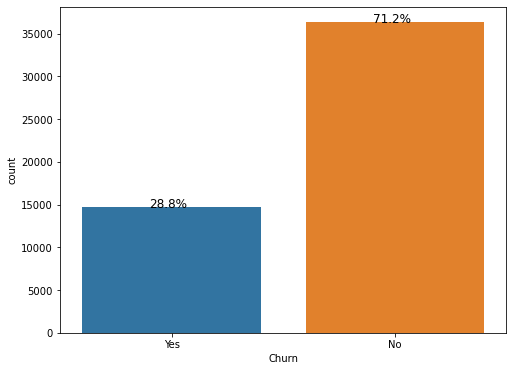

In [231]:
# Create count plot
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=df)

# Add percentage text to each bar
total = len(df['Churn'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    plt.gca().annotate(percentage, (x, y), size=12)

# Show plot
plt.show()

**Observation:**
    
As per the above graph our data is slightly imbalanced. 

In [232]:
df2=df1.copy()

In [233]:
df2.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,60,No,3-Good,Town,Crafts,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# New dataframe after cleaning

In [237]:
df2.to_csv(r'C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\Telecom churn\new 1\df_cleaned.csv',sep=',',index=False)